In [3]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow import keras
from keras import layers
from matplotlib import pyplot as plt
import os
%matplotlib inline



data_dir = "/content/drive/MyDrive/Dataset_Resized2"
image_size = (200, 200)

#new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#plt.imshow(new_array,cmap='gray')
#plt.show()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import imghdr

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
image_class=['Not-Covid','COVID']

In [ ]:
data_class = os.listdir(data_dir)

In [ ]:
data_class

['Not-Covid-Resized', 'Corona-Resized']

In [ ]:

data_class.remove('.DS_Store')

ValueError: ignored

In [ ]:
for image_class in data_class: 
    for image in (os.path.join(data_class, image_class)):
        image_path = os.path.join(data_class, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
               #os.remove(image_path)

TypeError: ignored

In [67]:
#train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 #   data_dir,
  #  validation_split=0.2,
  #  subset="training",
   # seed=42,
   # image_size=image_size,
   # batch_size=32,
   # labels="inferred",
   # label_mode="binary",
   # class_names=None,
   # color_mode="rgb",
   # shuffle=True,
#)


dataset = tf.keras.preprocessing.image_dataset_from_directory(
     data_dir,
     labels="inferred",
     label_mode="binary",
     class_names=None,
     color_mode="rgb",
     batch_size=30,
     image_size=image_size,
     shuffle=True,
     seed=40,
     validation_split=None,
     subset=None,
     interpolation="bilinear",
 )
 

#val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 #   data_dir,
  # subset="validation",
  #  seed=42,
  #  image_size=image_size,
  #  batch_size=32,
#)








Found 3000 files belonging to 2 classes.


In [6]:
dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

In [68]:
from sklearn.model_selection import train_test_split 

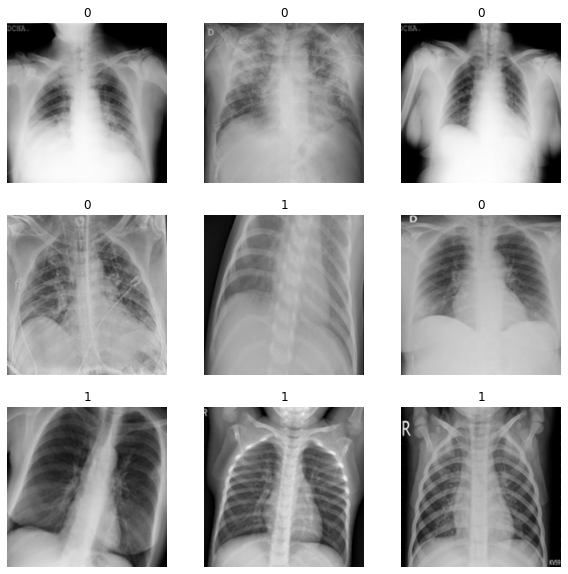

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
##Not-Covid=1 & Covid=0

In [69]:
data = dataset.map(lambda x,y: (x/255, y))

In [70]:
data.as_numpy_iterator().next()

(array([[[[0.18015686, 0.18015686, 0.18015686],
          [0.18086274, 0.18086274, 0.18086274],
          [0.18650195, 0.18650195, 0.18650195],
          ...,
          [0.19333334, 0.19333334, 0.19333334],
          [0.18533956, 0.18533956, 0.18533956],
          [0.19099453, 0.19099453, 0.19099453]],
 
         [[0.17721882, 0.17721882, 0.17721882],
          [0.17858824, 0.17858824, 0.17858824],
          [0.1849098 , 0.1849098 , 0.1849098 ],
          ...,
          [0.18966277, 0.18966277, 0.18966277],
          [0.173774  , 0.173774  , 0.173774  ],
          [0.17384629, 0.17384629, 0.17384629]],
 
         [[0.17952158, 0.17952158, 0.17952158],
          [0.18501961, 0.18501961, 0.18501961],
          [0.18905883, 0.18905883, 0.18905883],
          ...,
          [0.1732942 , 0.1732942 , 0.1732942 ],
          [0.14959203, 0.14959203, 0.14959203],
          [0.1473804 , 0.1473804 , 0.1473804 ]],
 
         ...,
 
         [[0.21451768, 0.21451768, 0.21451768],
          [0.22290

In [72]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [58]:
print(train_size,val_size,test_size)

140 20 40


In [73]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

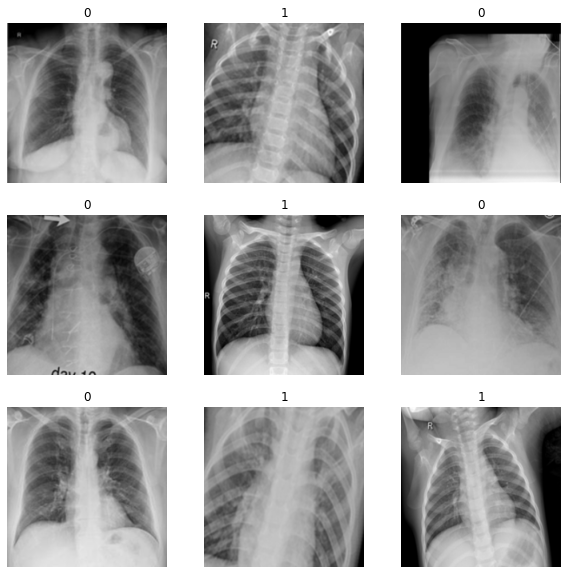

In [78]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")

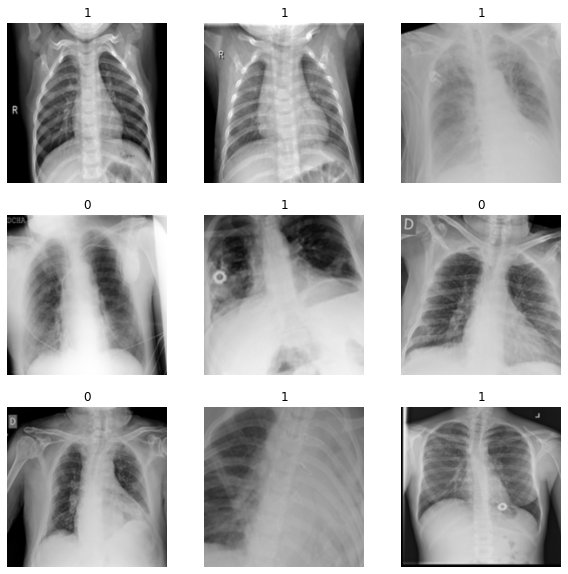

In [79]:
plt.figure(figsize=(10, 10))
for images, labels in val.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")

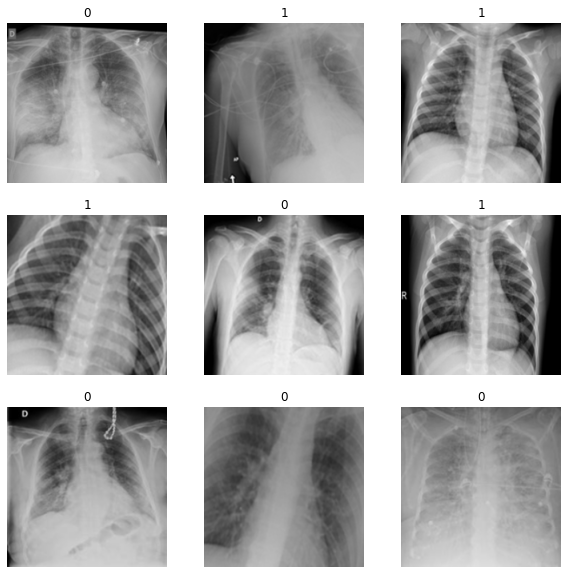

In [80]:
plt.figure(figsize=(10, 10))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")

In [74]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization ,AveragePooling2D


import matplotlib.pyplot as plt





In [75]:
model = Sequential()


In [76]:
model.add(Conv2D(32, (3,3), 1, activation='relu',padding="same", input_shape=(200,200,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), 1, activation='relu',padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))


model.add(Flatten())




model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.005)
#opt = keras.optimizers.SGD(
 #   learning_rate=0.005, momentum=0.9, name="SGD"
#)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 batch_normalization_35 (Bat  (None, 200, 200, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 200, 200, 32)      9248      
                                                                 
 batch_normalization_36 (Bat  (None, 200, 200, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                      

In [77]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [78]:
logdir='logs'

In [79]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [80]:
checkpoint = keras.callbacks.ModelCheckpoint("model-{epoch:03d}-{accuracy}-{val_accuracy}.h5",save_best_only=True,monitor="val_accuracy")




In [81]:
hist = model.fit(train, epochs=50, callbacks=[checkpoint],validation_data=val)




Epoch 1/50
80/80 [==============================] - 74s 912ms/step - loss: 0.5465 - accuracy: 0.7829 - val_loss: 1.9048 - val_accuracy: 0.4767
Epoch 2/50
80/80 [==============================] - 17s 203ms/step - loss: 0.4016 - accuracy: 0.8279 - val_loss: 0.6412 - val_accuracy: 0.6833
Epoch 3/50
80/80 [==============================] - 16s 193ms/step - loss: 0.3756 - accuracy: 0.8388 - val_loss: 0.6183 - val_accuracy: 0.6567
Epoch 4/50
80/80 [==============================] - 16s 198ms/step - loss: 0.3022 - accuracy: 0.8758 - val_loss: 0.6662 - val_accuracy: 0.6167
Epoch 5/50
80/80 [==============================] - 16s 192ms/step - loss: 0.2541 - accuracy: 0.8971 - val_loss: 0.6174 - val_accuracy: 0.6700
Epoch 6/50
80/80 [==============================] - 16s 194ms/step - loss: 0.2420 - accuracy: 0.8958 - val_loss: 0.6645 - val_accuracy: 0.6300
Epoch 7/50
80/80 [==============================] - 16s 196ms/step - loss: 0.2284 - accuracy: 0.9100 - val_loss: 0.2603 - val_accuracy: 0.8800

In [1]:
print(hist.history)
best_score = max(hist.history['val_accuracy'])

print(best_score)

NameError: ignored

In [104]:
hist.history

{'accuracy': [0.7829166650772095,
  0.82791668176651,
  0.8387500047683716,
  0.8758333325386047,
  0.8970833420753479,
  0.8958333134651184,
  0.9100000262260437,
  0.9133333563804626,
  0.9291666746139526,
  0.9237499833106995,
  0.9399999976158142,
  0.9579166769981384,
  0.9545833468437195,
  0.8966666460037231,
  0.9262499809265137,
  0.9420833587646484,
  0.9579166769981384,
  0.9662500023841858,
  0.9683333039283752,
  0.9366666674613953,
  0.9445833563804626,
  0.9733333587646484,
  0.956250011920929,
  0.9679166674613953,
  0.9762499928474426,
  0.9808333516120911,
  0.9829166531562805,
  0.9854166507720947,
  0.9791666865348816,
  0.9850000143051147,
  0.9891666769981384,
  0.9925000071525574,
  0.9908333420753479,
  0.9941666722297668,
  0.9912499785423279,
  0.9937499761581421,
  0.9879166483879089,
  0.9916666746139526,
  0.9925000071525574,
  0.9933333396911621,
  0.9900000095367432,
  0.9900000095367432,
  0.9891666769981384,
  0.9816666841506958,
  0.9829166531562805,
 

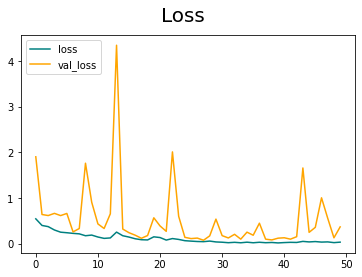

In [125]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

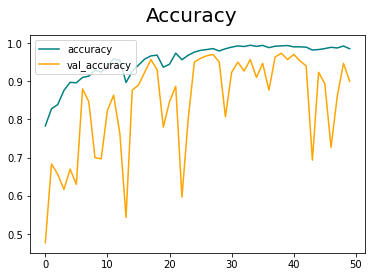

In [126]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [85]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [124]:
predictionModel = keras.models.load_model("/content/drive/MyDrive/model-039-0.9925000071525574-0.9733333587646484.h5")

In [102]:
pre = Precision()
acc = BinaryAccuracy()
rec = Recall()

In [109]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = predictionModel.predict(X)
    pre.update_state(y, yhat)
    acc.update_state(y, yhat)
    rec.update_state(y, yhat)

In [88]:
len(test)

10

In [110]:
print(f'Precision:{pre.result().numpy()},Recall:{rec.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9731800556182861,Recall:0.8193548321723938, Accuracy:0.8949999809265137


In [90]:
test_size

10

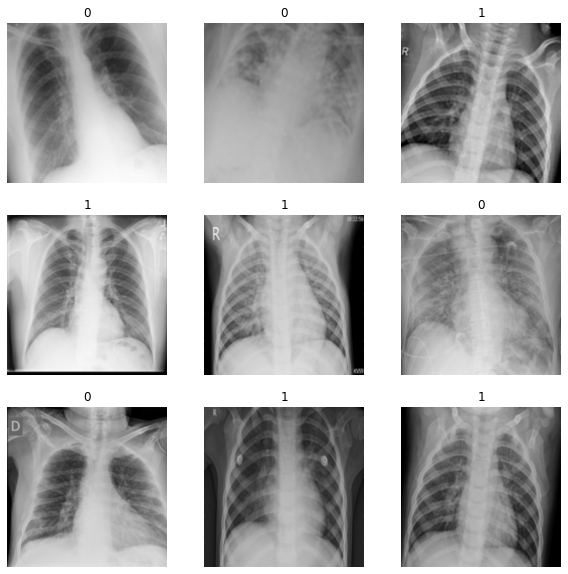

In [84]:

plt.figure(figsize=(10, 10))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(int(labels[i]))
        plt.axis("off")


In [113]:
import cv2

In [114]:
img = cv2.imread('/content/drive/MyDrive/Not-Covid1198.png')



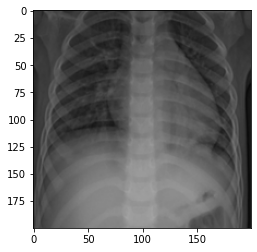

In [115]:
resize = tf.image.resize(img,(200,200))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [116]:
resize.shape

TensorShape([200, 200, 3])

In [117]:
np.expand_dims(resize,0).shape

(1, 200, 200, 3)

In [118]:
yhat = predictionModel.predict(np.expand_dims(resize/255,0))

In [119]:
yhat

array([[0.99923825]], dtype=float32)

In [120]:
#not-covid=1 ,covid=0

if yhat > 0.5: 
    print(f'Predicted class is Not-Covid')
else:
    print(f'Predicted class is Covid')

Predicted class is Not-Covid


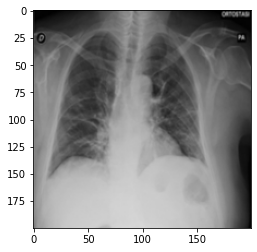

(1, 200, 200, 3)

In [122]:
img2 = cv2.imread('/content/drive/MyDrive/Corona-Resized1300.png')
resize = tf.image.resize(img2,(200,200))
plt.imshow(resize.numpy().astype(int))
plt.show()
np.expand_dims(resize,0).shape

In [123]:
yhat2 = predictionModel.predict(np.expand_dims(resize/255,0))
yhat2
if yhat2 > 0.5: 
    print(f'Predicted class is Not-Covid')
else:
    print(f'Predicted class is Covid')

Predicted class is Covid
